## **Bibliotecas**

In [77]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import os
import glob

## **Unindo Arquivos**

In [78]:
def merge_excels(pasta_entrada, pasta_saida):
    # encontrar todos os arquivos Excel na pasta de entrada
    arquivos_excel = glob.glob(os.path.join(pasta_entrada, "*.xlsx"))
    
    # Lista para armazenar os dataframes
    dfs = []

    # armazenando os arquivos Excel encontrados
    for arquivo in arquivos_excel:
        df = pd.read_excel(arquivo)
        dfs.append(df)

    # Concatenando todos os dataframes
    arquivo_total = pd.concat(dfs, ignore_index=True)

    # Salvando o dataframe combinado em um novo arquivo Excel
    arquivo_total.to_excel(pasta_saida, index=False)

pasta_entrada = 'C://Users/PC/Documents/relatorio_vendas'
pasta_saida = 'C://Users/PC/Documents/relatorio_vendas_totais/relatorio_total_lojas.xlsx'
merge_excels(pasta_entrada, pasta_saida)

## **Localizando Arquivo Mais Recente**

In [79]:
#diretorio dos arquivos 
diretorio_arquivos = "C://Users/PC/Documents/relatorio_vendas_totais"
#listagem de todos arquivos do diretorio
lista_arquivos = os.listdir(diretorio_arquivos)
#armazena as datas e os aquivos 
lista_datas = []

#obtem a data de cada arquivo e armazena na lista de datas
for arquivo in lista_arquivos:
    data = os.path.getmtime(f"{diretorio_arquivos}/{arquivo}")
    lista_datas.append((data,arquivo))
    
lista_datas.sort(reverse=True)
ultimo_arquivo = lista_datas[0]
print(ultimo_arquivo[1])

relatorio_total_lojas.xlsx


## **Importando a Base de Dados**

In [80]:
base_dados = base_dados = pd.read_excel(f"C://Users/PC/Documents/relatorio_vendas_totais/{ultimo_arquivo[1]}")
display(base_dados)

,Data,ID Loja,Produto,Quantidade,Valor Unitário,Valor Final
0,2019-12-03,Bourbon Shopping SP,Bermuda Listrada,1,163,163
1,2019-12-03,Bourbon Shopping SP,Bermuda Xadrez,3,155,465
2,2019-12-03,Bourbon Shopping SP,Bermuda Estampa,1,169,169
3,2019-12-04,Bourbon Shopping SP,Bermuda Estampa,2,169,338
4,2019-12-05,Bourbon Shopping SP,Bermuda Listrada,1,163,163
5,2019-12-07,Bourbon Shopping SP,Bermuda,3,150,450
6,2019-12-14,Bourbon Shopping SP,Bermuda Linho,1,195,195
7,2019-12-15,Bourbon Shopping SP,Bermuda Listrada,2,163,326
8,2019-12-16,Bourbon Shopping SP,Bermuda Listrada,2,163,326
9,2019-12-17,Bourbon Shopping SP,Bermuda,2,150,300


## **Analisando a Base de Dados**

### **Verificação de Duplicação**

In [81]:
duplicatas = base_dados.duplicated(keep=False)  #Keep=False marca todas as duplicatas
if duplicatas.any():
    linhas_duplicadas = base_dados[duplicatas]
    print("Alerta: Existem duplicatas nas seguintes linhas:")
    print(linhas_duplicadas)
    #interrompe a execução do programa
    raise Exception("Execução interrompida devido a duplicatas na base de dados.")

### **Colunas**

In [82]:
base_dados.columns

Index(['Data', 'ID Loja', 'Produto', 'Quantidade', 'Valor Unitário',
       'Valor Final'],
      dtype='object')

### **linhas e Colunas**

In [83]:
base_dados.shape

(45, 6)

### **Células Nulas**

In [84]:
nulos = base_dados.isnull().any(axis=1)  #Verifica se há algum valor nulo em cada linha
if nulos.any():
    linhas_nulas = base_dados[nulos]
    print("Alerta: Existem células nulas nas seguintes linhas:")
    print(linhas_nulas)
    #interrompe a execução do programa
    raise Exception("Execução interrompida devido a células nulas na base de dados.")

## **Faturamento Total**

In [85]:
faturamento_total = base_dados["Valor Final"].sum()
print(f"Faturamento Total: R${faturamento_total:.2f}")

Faturamento Total: R$51573.00


## **Peças Vendidas (total)**

In [86]:
total_pecas = base_dados["Quantidade"].sum()
print(f'Total de Peças Vendidas: {total_pecas}')

Total de Peças Vendidas: 323


## **Faturamento por Loja**

In [97]:
faturamento_lojas = base_dados[["ID Loja","Valor Final"]].groupby("ID Loja").sum().sort_values(by="Valor Final",ascending=False)
display(faturamento_lojas)

,Valor Final
ID Loja,
Iguatemi Campinas,41720
Bourbon Shopping SP,4386
Center Shopping Uberlândia,2994
Iguatemi Esplanada,2473


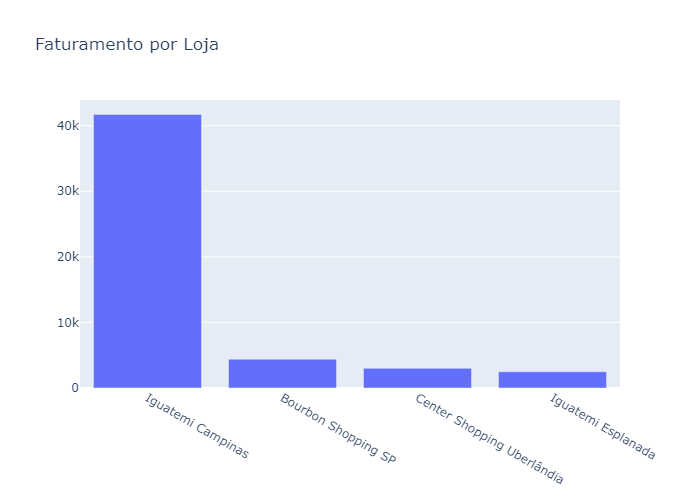

In [88]:
labels = faturamento_lojas.index
values = faturamento_lojas["Valor Final"]
fig = go.Figure(data=[go.Bar(x=labels,y=values)],layout_title_text="Faturamento por Loja")
fig.show(renderer="png")

## **Faturamento por Loja e por Produto**

In [89]:
faturamento_produtos = base_dados[["ID Loja", "Produto", "Valor Final"]].groupby(["ID Loja", "Produto"]).sum()
display(faturamento_produtos)

Valor Final
ID Loja                    Produto                      
Bourbon Shopping SP        Bermuda                   750
                           Bermuda Estampa          1183
                           Bermuda Linho             195
                           Bermuda Listrada         1793
                           Bermuda Xadrez            465
Center Shopping Uberlândia Bermuda Estampa           338
                           Bermuda Linho             780
                           Bermuda Listrada          326
                           Bermuda Xadrez           1550
Iguatemi Campinas          Bermuda                  1200
                           Bermuda Estampa           845
                           Bermuda Linho            1170
                           Bermuda Lisa            36581
                           Bermuda Listrada         1304
                           Bermuda Xadrez            620
Iguatemi Esplanada         Bermuda                   150
                           Bermuda Estampa           338
                           Bermuda Linho            1365
                           Bermuda Xadrez            620

## **Faturamento por Produto**

In [90]:
faturamento_produto = base_dados[["Produto", "Valor Final"]].groupby("Produto").sum().sort_values(by="Valor Final", ascending=False)
display(faturamento_produto)

,Valor Final
Produto,
Bermuda Lisa,36581
Bermuda Linho,3510
Bermuda Listrada,3423
Bermuda Xadrez,3255
Bermuda Estampa,2704
Bermuda,2100


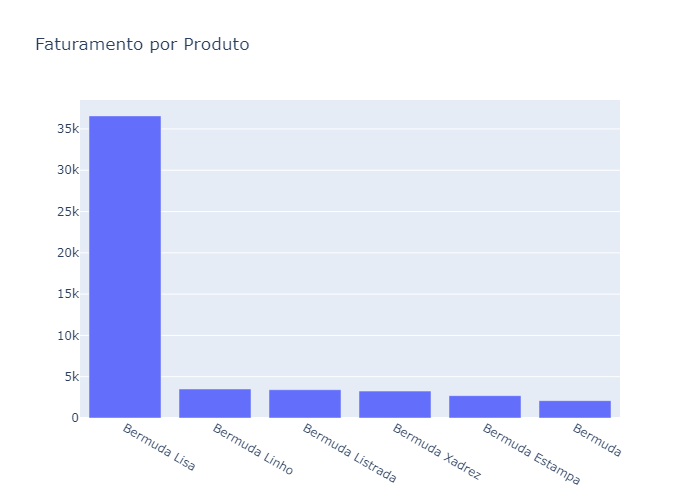

In [91]:
labels = faturamento_produto.index
values = faturamento_produto["Valor Final"]
fig = go.Figure(data=[go.Bar(x=labels,y=values)],layout_title_text="Faturamento por Produto")
fig.show(renderer="png")

## **Produto Mais Vendido (quantidade)**

In [92]:
produto_mv = base_dados[["Produto", "Quantidade"]].groupby("Produto").sum().sort_values(by="Quantidade",ascending=False)
display(produto_mv)

,Quantidade
Produto,
Bermuda Lisa,233
Bermuda Listrada,21
Bermuda Xadrez,21
Bermuda Linho,18
Bermuda Estampa,16
Bermuda,14


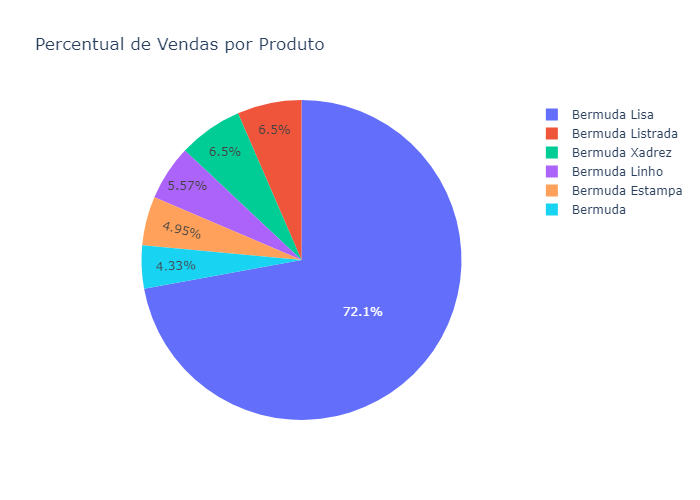

In [93]:
labels = produto_mv.index
values = produto_mv["Quantidade"]
fig = go.Figure(data=[go.Pie(labels=labels, values=values)],layout_title_text="Percentual de Vendas por Produto")
fig.show(renderer="png")

## **Faturamento por Dia**

In [94]:
faturamento_dia = base_dados[["Data","Valor Final"]].groupby("Data").sum().sort_values(by="Valor Final", ascending=False)
display(faturamento_dia)

,Valor Final
Data,
2019-12-25,15700
2019-12-24,13021
2019-12-05,9398
2019-12-04,1708
2019-12-08,1456
2019-12-17,1441
2019-12-01,1398
2019-12-15,1066
2019-12-21,975


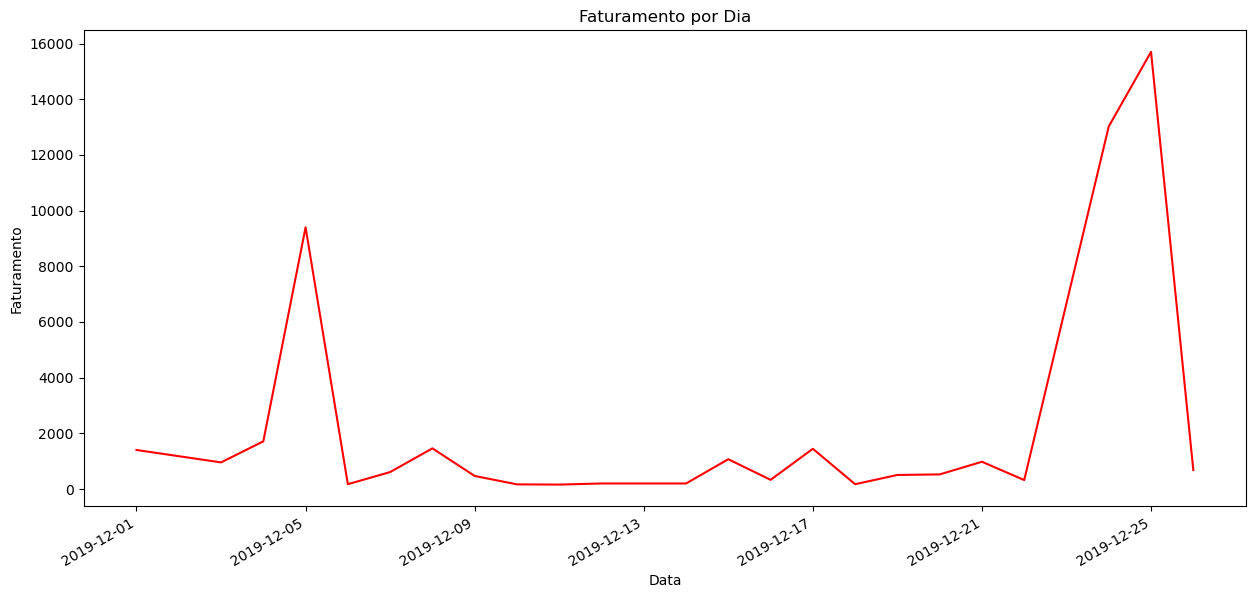

In [95]:
faturamento_dia.groupby("Data").sum().plot(kind='line', figsize=(15,7),legend=False,color="Red")
plt.title("Faturamento por Dia")
plt.ylabel("Faturamento")
plt.show("plt.png")